# Topic Analysis of Review Data.

#### DESCRIPTION

Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

Problem Statement: 

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

Domain: Amazon reviews for a leading phone brand

Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

Content: 

Dataset: ‘K8 Reviews v0.2.csv’

Columns:

Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)

Reviews: The main text of the review

Steps to perform:

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.

Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

Tasks: 

1.Read the .csv file using Pandas. Take a look at the top few records.

2.Normalize casings for the review text and extract the text into a list for easier manipulation.

3.Tokenize the reviews using NLTKs word_tokenize function.

4.Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

5.For the topic model, we should  want to include only nouns.

Find out all the POS tags that correspond to nouns.

Limit the data to only terms with these tags.

6.Lemmatize. 

Different forms of the terms need to be treated as one.

No need to provide POS tag to lemmatizer for now.

7.Remove stopwords and punctuation (if there are any). 

8.Create a topic model using LDA on the cleaned up data with 12 topics.

Print out the top terms for each topic.

What is the coherence of the model with the c_v metric?

9.Analyze the topics through the business lens.

Determine which of the topics can be combined.

10.Create topic model using LDA with what you think is the optimal number of topics

What is the coherence of the model?

11.The business should  be able to interpret the topics.

Name each of the identified topics.

Create a table with the topic name and the top 10 terms in each to present to the  business.

In [1]:
# Importing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer 
import numpy as np
from sklearn.model_selection import GridSearchCV 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Task 1: Read the .csv file using Pandas. Take a look at the top few records.

In [3]:
df = pd.read_csv('K8 Reviews v0.2.csv')

In [4]:
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [6]:
df['sentiment'].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

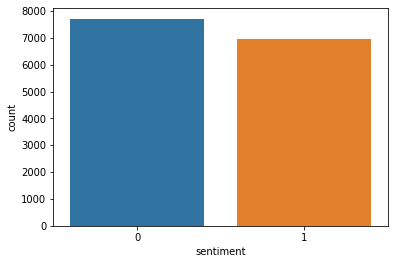

In [7]:
sns.countplot(x='sentiment',data=df)


## Task 2. Normalize casings for the review text and extract the text into a list for easier manipulation.

In [8]:
reviews = df['review'].values

In [9]:
reviews

array(['Good but need updates and improvements',
       "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",
       'when I will get my 10% cash back.... its already 15 January..',
       ..., 'Awesome Gaget.. @ this price',
       'This phone is nice processing will be successful but dual camera is not be successfully in dual mod',
       'Good product but the pakeging was not enough.'], dtype=object)

In [10]:
reviews = [review.lower() for review in reviews]

In [11]:
reviews[:10]

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

## Task 3. Tokenize the reviews using NLTKs word_tokenize function.

In [12]:
tokens = [nltk.word_tokenize(review) for review in reviews]

In [13]:
tokens[:5]

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

## Task 4: Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [14]:
pos_tagged_tokens = [nltk.pos_tag(token) for token in tokens]

In [15]:
pos_tagged_tokens[:5]

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  (',', ','),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  (',', ','),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('6', 'CD'),
  ('to', 'TO'),
  ('7', 'CD'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'JJ'),
  ('uses', 'NNS'),
  (',', ','),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged.this', 'NN'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('&', 'CC'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  (',', ','),
  ('they', 'PRP'),


In [16]:
pos_tagged_tokens[0]

[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

## Task 5: For the topic model, we should  want to include only nouns.

In [17]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [18]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

We want to include only the nouns for topic modelling as topics are all nouns. We include NN, NNP, NNPS and NNS as all these are nouns.

In [19]:
pos_tagged_tokens[:5]

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  (',', ','),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  (',', ','),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('6', 'CD'),
  ('to', 'TO'),
  ('7', 'CD'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'JJ'),
  ('uses', 'NNS'),
  (',', ','),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged.this', 'NN'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('&', 'CC'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  (',', ','),
  ('they', 'PRP'),


In [20]:
nouns = []
for sent in pos_tagged_tokens:    
    nouns.append([token for token in sent if re.search('NN.*',token[1])])

In [21]:
nouns[:5]


[[('updates', 'NNS'), ('improvements', 'NNS')],
 [('mobile', 'NN'),
  ('i', 'NN'),
  ('battery', 'NN'),
  ('hell', 'NN'),
  ('backup', 'NN'),
  ('hours', 'NNS'),
  ('uses', 'NNS'),
  ('idle', 'NN'),
  ('discharged.this', 'NN'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('battery', 'NN'),
  ('charger', 'NN'),
  ('hours', 'NNS'),
  ('don', 'NN')],
 [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')],
 [],
 [('phone', 'NN'),
  ('everthey', 'NN'),
  ('phone', 'NN'),
  ('problem', 'NN'),
  ('amazon', 'NN'),
  ('phone', 'NN'),
  ('amazon', 'NN')]]

## Task 6 Lemmatize. Different forms of the terms need to be treated as one.

Lemmatizer stems the word to its base form. For example, we can see that words like problems, glitches, features become problem, glitch and feature respectively. Lemmatizer is similar to stemming but more advanced as stemming simply cuts the word to its root, sometimes without any meaning. Lemmatization preserves the meaning of the words.

In [22]:
lemmatizer = WordNetLemmatizer()
nouns_lemmatized = []
for sent in nouns:    
    nouns_lemmatized.append([lemmatizer.lemmatize(word[0]) for word in sent])
    

In [23]:
nouns_lemmatized[:5]

[['update', 'improvement'],
 ['mobile',
  'i',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour',
  'don'],
 ['i', '%', 'cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon']]

## Task 7: Remove stopwords and punctuation (if there are any). 

In [24]:
# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = []
for sent in nouns_lemmatized:    
    tokens.append([word for word in sent if not word in stop_words])

In [25]:
tokens[:5]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['%', 'cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon']]

In [26]:
punct_removed = []
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
for sent in tokens:
    punct_removed.append([re_punc.sub('', word) for word in sent])

In [27]:
punct_removed[:5]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'dischargedthis',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['', 'cash', ''],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon']]

In [28]:
br_removed = []
re_br = re.compile('(br)$')
for sent in punct_removed:
    br_removed.append([re_br.sub('', word) for word in sent])

In [29]:
br_removed[:5]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'dischargedthis',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['', 'cash', ''],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon']]

In [30]:
# remove remaining tokens that are not alphabetic
tokens = []
for sent in br_removed:
    tokens.append([word for word in sent if word.isalpha()])

In [31]:
tokens[:5]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'dischargedthis',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon']]

## Task 8: Create a topic model using LDA on the cleaned up data with 12 topics.



Topic modelling is the task of extracting topics from documents.
This is an unsupervised learning technique. Topic modelling is useful in document clustering, document labelling etc.
We use LDA to do topic modelling.
Latent Dirichlet Allocolation (LDA) is a matrix factorization technique. 
In LDA, documents need to be represented as a Document Term Matrix.
LDA converts the document term matrix into 2 simpler matrices.
LDA introduces a latent layer called topics.
The 2 simpler matrices are Document Topic matrix and Topic term matrix.
LDA is a dimensionality reduction technique as it reduces the number of parameters, without losing information.
We do LDA first using sklearn decomposition library and then using gensim library.

### 1. LDA using sklearn decomposition

In [32]:
tokens_list = [word for sent in tokens for word in sent] 

In [33]:
tokens_list[:5]

['update', 'improvement', 'mobile', 'battery', 'hell']

In [34]:
# Use features_lda (raw term count) features for LDA.
n_topics = 12
vect_lda = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=5000,
                                stop_words='english')

lda = LatentDirichletAllocation(n_components=n_topics, random_state=100,max_iter=5,
                                learning_method='online',learning_offset=50.)
features_lda = vect_lda.fit_transform(tokens_list)
lda.fit(features_lda)
lda_feature_names = vect_lda.get_feature_names()

In [35]:
n_top_words = 10
for i, topic_vec in enumerate(lda.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(lda_feature_names[fid], end=' ')
    print()

0 option update video handset replacement data android smartphone card hang 
1 product heating use lot value delivery customer photo support center 
2 battery time service speaker sim depth picture cast power request 
3 camera display app hai jio headphone earphone memory volume killer 
4 phone mobile feature thing look prize credit sctrach gay kerta 
5 hour mode sound waste mark dolby bit light sensor effect 
6 problem day charger heat glass ram apps care till rate 
7 money network device software music game work hr star piece 
8 price month experience speed review stock model buy mah image 
9 performance amazon screen processor superb week clarity company contact signal 
10 issue note lenovo turbo minute centre item gud cable hotspot 
11 quality backup range life charge drain usage charging budget return 


In [36]:
# visualize top words for each model
def plot_top_words(model, feature_names, n_top_words, title, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                    fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

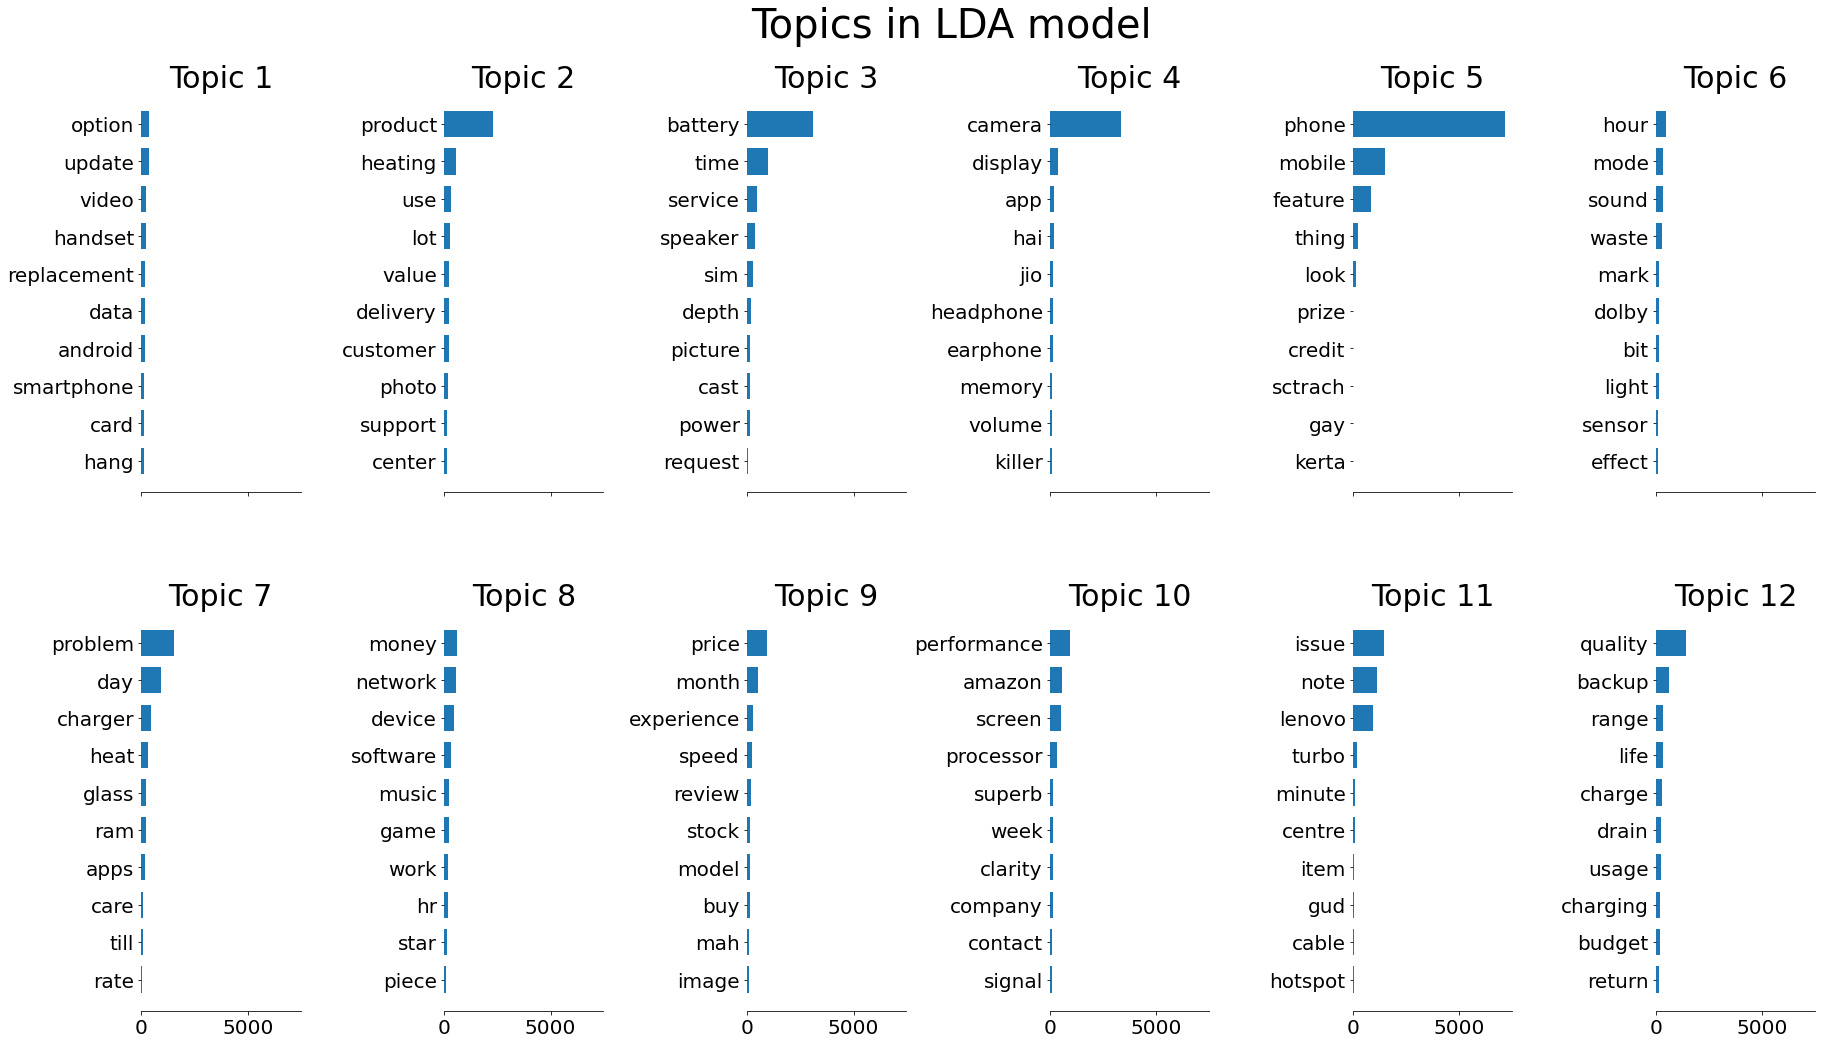

In [37]:
plot_top_words(lda, lda_feature_names, n_top_words, 'Topics in LDA model',2,6)

## Task 9. Analyze the topics through the business lens. Determine which of the topics can be combined.

In [38]:
#Topic 8 and Topic 9 are vaguely about the cost
#Topic 3 and 12 are vaguely about the battery life and charger.
#Topic 2, 11 and 7 are vaguely about the product heating and problems
# These topics can be combined. 

In [39]:
# List the top 10 words
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index}')
    print([vect_lda.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for Topic #0
['hang', 'card', 'smartphone', 'android', 'data', 'replacement', 'handset', 'video', 'update', 'option']


Top 10 words for Topic #1
['center', 'support', 'photo', 'customer', 'delivery', 'value', 'lot', 'use', 'heating', 'product']


Top 10 words for Topic #2
['request', 'power', 'cast', 'picture', 'depth', 'sim', 'speaker', 'service', 'time', 'battery']


Top 10 words for Topic #3
['killer', 'volume', 'memory', 'earphone', 'headphone', 'jio', 'hai', 'app', 'display', 'camera']


Top 10 words for Topic #4
['kerta', 'gay', 'sctrach', 'credit', 'prize', 'look', 'thing', 'feature', 'mobile', 'phone']


Top 10 words for Topic #5
['effect', 'sensor', 'light', 'bit', 'dolby', 'mark', 'waste', 'sound', 'mode', 'hour']


Top 10 words for Topic #6
['rate', 'till', 'care', 'apps', 'ram', 'glass', 'heat', 'charger', 'day', 'problem']


Top 10 words for Topic #7
['piece', 'star', 'hr', 'work', 'game', 'music', 'software', 'device', 'network', 'money']


Top 10 words for 

In [40]:
# recommended installation with "gensim" for topic modeling
#!pip install -U "tmtoolkit[recommended,gensim]"

In [41]:
import tmtoolkit

In [42]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

In [43]:
# Calculate coherence
# Tokenize cleaned up corpus
tp_tokens = [doc.split() for doc in tokens_list]

# C_V coherence

metric_coherence_gensim(measure='c_v', 
                        top_n=12, 
                        topic_word_distrib=lda.components_, 
                        dtm=features_lda, 
                        vocab=np.array(lda_feature_names), 
                        texts=tp_tokens)


[0.7047598939013419,
 0.7163920084238806,
 0.7117810185937277,
 0.7053689166984753,
 0.6252001593458175,
 0.7052530371228336,
 0.7071761185774368,
 0.7124607558656569,
 0.7059586925947374,
 0.7063264704080142,
 0.695740154098745,
 0.7205257489903963]

Coherence measures the interpretability of the topics. Good value for Coherence measure c_V is between 0.5 to 0.7.

After we combined some topics, we are left with 8 topics. Lets repeat the LDA for 8 topics and see the result.

In [44]:
# Use features_lda (raw term count) features for LDA.
n_topics = 8
vect_lda = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=5000,
                                stop_words='english')

lda = LatentDirichletAllocation(n_components=n_topics, random_state=100,max_iter=5,
                                learning_method='online',learning_offset=50.)
features_lda = vect_lda.fit_transform(tokens_list)
lda.fit(features_lda)
lda_feature_names = vect_lda.get_feature_names()

In [45]:
n_top_words = 10
for i, topic_vec in enumerate(lda.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(lda_feature_names[fid], end=' ')
    print()


0 feature network month update video drain handset charging customer hr 
1 product issue lenovo heating service lot charge value delivery speed 
2 battery problem time amazon work photo depth picture power clarity 
3 camera quality display software experience music app ram apps jio 
4 mobile backup hour use thing usage turbo look bit support 
5 note price option mode sound life waste game hai budget 
6 day screen charger range processor heat glass replacement android star 
7 phone performance money device speaker sim review return smartphone card 


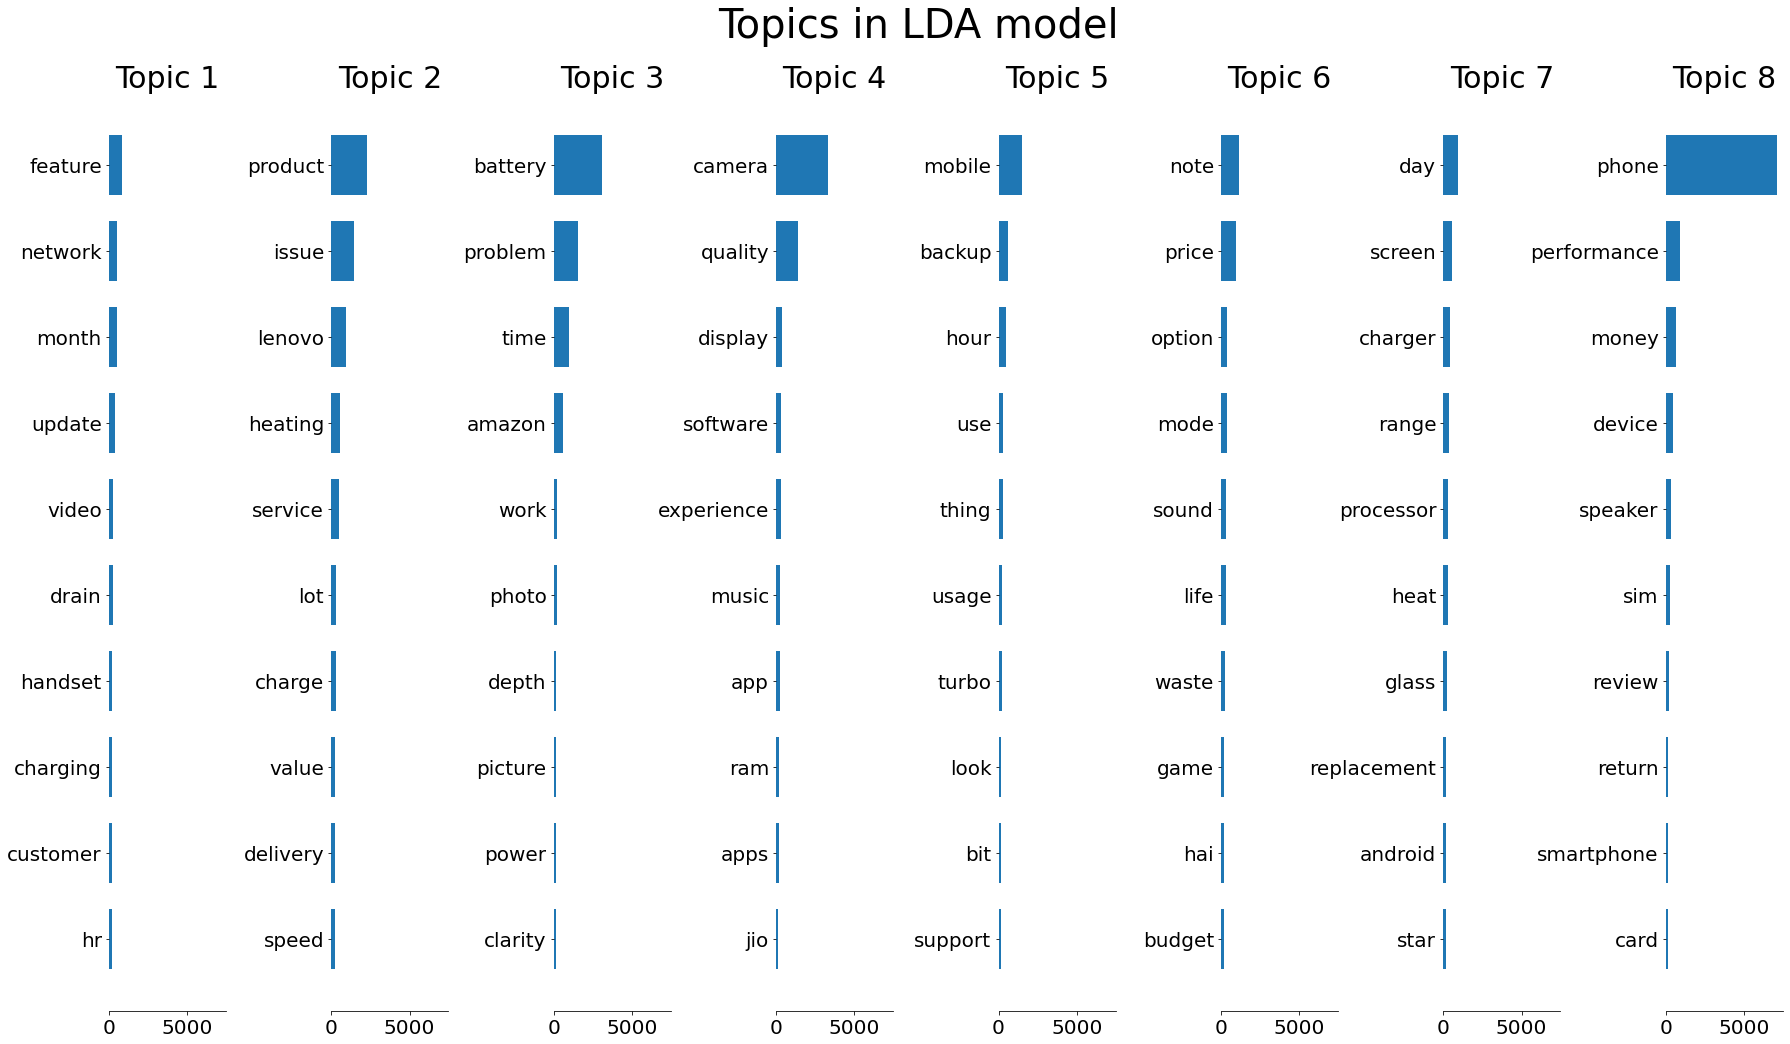

In [46]:

plot_top_words(lda, lda_feature_names, n_top_words, 'Topics in LDA model',1,8)


In [47]:

# Calculate coherence
# Tokenize cleaned up corpus
tp_tokens = [doc.split() for doc in tokens_list]

# C_V coherence

metric_coherence_gensim(measure='c_v', 
                        top_n=8, 
                        topic_word_distrib=lda.components_, 
                        dtm=features_lda, 
                        vocab=np.array(lda_feature_names), 
                        texts=tp_tokens)


[0.6050646586211936,
 0.6284553880560317,
 0.618725401394414,
 0.6159841471314753,
 0.6079911910796645,
 0.6137126020653882,
 0.6063788032461894,
 0.6224073391212486]

### 2. Perform LDA using gensim

In [48]:
import gensim
import gensim.corpora as corpora
import gensim.models.coherencemodel as CoherenceModel

In [49]:
tokens[:5]

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'dischargedthis',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon']]

In [50]:
new_tokens = []
for sent in tokens:
    if (len(sent) != 0):
        new_tokens.append(sent)

In [51]:
id2word = corpora.Dictionary(new_tokens)
id2word

In [52]:
texts = new_tokens

In [53]:
corpus = [id2word.doc2bow(text) for text in texts]

In [54]:
corpus[0]

[(0, 1), (1, 1)]

In [55]:
## LDA for 12 topics

In [56]:
lda_gensim_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=12, passes=10, per_word_topics=True, random_state=100)

In [57]:
print(lda_gensim_model.print_topics()[0])

(0, '0.239*"mobile" + 0.124*"price" + 0.099*"money" + 0.064*"phone" + 0.045*"waste" + 0.044*"range" + 0.038*"value" + 0.030*"glass" + 0.017*"gorilla" + 0.016*"excellent"')


In [58]:
print(lda_gensim_model.print_topics()[1])

(1, '0.083*"device" + 0.061*"handset" + 0.057*"hai" + 0.038*"box" + 0.028*"headphone" + 0.025*"piece" + 0.020*"ho" + 0.019*"hi" + 0.017*"tv" + 0.017*"bill"')


In [59]:
print(lda_gensim_model.print_topics()[2])

(2, '0.238*"performance" + 0.072*"camera" + 0.054*"ram" + 0.047*"speed" + 0.044*"processor" + 0.027*"worth" + 0.026*"gb" + 0.020*"update" + 0.019*"class" + 0.016*"look"')


In [60]:
print(lda_gensim_model.print_topics()[3])

(3, '0.077*"call" + 0.074*"speaker" + 0.049*"everything" + 0.035*"work" + 0.034*"apps" + 0.026*"hang" + 0.024*"volume" + 0.023*"light" + 0.021*"option" + 0.020*"application"')


In [61]:
print(lda_gensim_model.print_topics()[4])

(4, '0.283*"phone" + 0.082*"note" + 0.049*"lenovo" + 0.039*"feature" + 0.012*"budget" + 0.011*"system" + 0.010*"model" + 0.010*"update" + 0.010*"dolby" + 0.010*"screen"')


In [62]:
print(lda_gensim_model.print_topics()[5])

(5, '0.087*"phone" + 0.069*"service" + 0.067*"amazon" + 0.061*"time" + 0.031*"day" + 0.030*"customer" + 0.026*"month" + 0.025*"issue" + 0.024*"replacement" + 0.024*"return"')


In [63]:
print(lda_gensim_model.print_topics()[6])

(6, '0.123*"quality" + 0.113*"screen" + 0.066*"display" + 0.042*"cast" + 0.041*"smartphone" + 0.037*"buy" + 0.030*"expectation" + 0.025*"pls" + 0.025*"till" + 0.023*"option"')


In [64]:
print(lda_gensim_model.print_topics()[7])

(7, '0.215*"camera" + 0.080*"quality" + 0.067*"phone" + 0.026*"mode" + 0.018*"music" + 0.017*"video" + 0.015*"depth" + 0.014*"photo" + 0.014*"sound" + 0.012*"clarity"')


In [65]:
print(lda_gensim_model.print_topics()[8])

(8, '0.349*"battery" + 0.090*"backup" + 0.060*"camera" + 0.049*"life" + 0.033*"drain" + 0.018*"mah" + 0.016*"day" + 0.013*"ok" + 0.013*"mark" + 0.011*"plz"')


In [66]:
print(lda_gensim_model.print_topics()[9])

(9, '0.104*"phone" + 0.092*"issue" + 0.071*"battery" + 0.052*"day" + 0.044*"charger" + 0.043*"hour" + 0.030*"heat" + 0.029*"charge" + 0.028*"time" + 0.020*"turbo"')


In [67]:
print(lda_gensim_model.print_topics()[10])

(10, '0.478*"product" + 0.039*"delivery" + 0.020*"earphone" + 0.019*"amazon" + 0.016*"lenovo" + 0.015*"awesome" + 0.012*"condition" + 0.010*"offer" + 0.010*"thank" + 0.010*"complaint"')


In [68]:
print(lda_gensim_model.print_topics()[11])

(11, '0.216*"problem" + 0.078*"network" + 0.065*"heating" + 0.045*"issue" + 0.039*"sim" + 0.029*"phone" + 0.021*"jio" + 0.019*"call" + 0.017*"volta" + 0.017*"card"')


Coherence score for 12 topics

In [69]:
coherence_model = CoherenceModel.CoherenceModel(model=lda_gensim_model, texts=texts,dictionary=id2word,coherence='c_v')
coherence_lda = coherence_model.get_coherence()
coherence_lda

0.5269852837716734

## Task 10. Create topic model using LDA with what you think is the optimal number of topics

Topics 8,9 and 11 deal with issue/problem/batery/charger/heating. So they can be combined.
Topics 2 and 7 deal with camera /quality. So they can be combined.

we can set the optimal number of topics as 8.

In [70]:
lda_gensim_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=8, passes=10, per_word_topics=True, random_state=100)

### Coherence of the model

In [71]:
coherence_model = CoherenceModel.CoherenceModel(model=lda_gensim_model, texts=texts,dictionary=id2word,coherence='c_v')
coherence_lda = coherence_model.get_coherence()
coherence_lda

0.574572562839575

We can see that the coherence score has increased from 0.53 to 0.574 which is a good indication that the optimal number of topics is 8. Good coherence score should be between 0.5 and 0.7.

## Task 11. The business should  be able to interpret the topics.

In [72]:
print(lda_gensim_model.print_topics()[0])
print(lda_gensim_model.print_topics()[1])
print(lda_gensim_model.print_topics()[2])
print(lda_gensim_model.print_topics()[3])
print(lda_gensim_model.print_topics()[4])
print(lda_gensim_model.print_topics()[5])
print(lda_gensim_model.print_topics()[6])
print(lda_gensim_model.print_topics()[7])

(0, '0.183*"mobile" + 0.110*"price" + 0.076*"money" + 0.065*"phone" + 0.036*"range" + 0.034*"waste" + 0.029*"value" + 0.021*"superb" + 0.015*"feature" + 0.015*"heat"')
(1, '0.044*"handset" + 0.042*"device" + 0.041*"hai" + 0.035*"replacement" + 0.017*"headphone" + 0.015*"ho" + 0.013*"hi" + 0.012*"bill" + 0.010*"piece" + 0.010*"thanks"')
(2, '0.232*"battery" + 0.063*"phone" + 0.047*"performance" + 0.046*"backup" + 0.042*"camera" + 0.034*"day" + 0.030*"hour" + 0.025*"life" + 0.024*"issue" + 0.020*"problem"')
(3, '0.161*"product" + 0.108*"problem" + 0.052*"issue" + 0.050*"network" + 0.038*"heating" + 0.024*"sim" + 0.021*"call" + 0.013*"time" + 0.013*"jio" + 0.012*"work"')
(4, '0.202*"phone" + 0.056*"note" + 0.035*"lenovo" + 0.025*"feature" + 0.019*"update" + 0.019*"issue" + 0.013*"software" + 0.011*"screen" + 0.009*"day" + 0.009*"time"')
(5, '0.073*"phone" + 0.050*"amazon" + 0.044*"service" + 0.042*"product" + 0.039*"charger" + 0.026*"month" + 0.025*"time" + 0.023*"day" + 0.021*"delivery" 

### 1. Name each of the identified topics.

In [73]:
#Topic 0 deals with price/money/waste/value. So this can be termed as cost-effectiveness
#Topic 1 deals with handset/device/headphone/piece etc. This can be termed as device and accessories
#Topic 2 deals with battery/performance.backup/life. This can be termed as battery related
#Topic 3 deals with problem/issues/heating etc. This can be termed as product issues
#Topic 4 deals with features/software/update/issue. This can be termed as software issues
#Topic 5 deals with deals with amazon/service/delivery/customer. This can be termed as customer-service
#Topic 6 deals with screen/display/message/notification/contact/call. This can be termed as communication/connectivity
#Topic 7 deals with camera/quality/video/photo/sound. This can be termed as audio/video

### 2. Create a table with the topic name and the top 10 terms in each to present to the  business.

<table>
<tr>
    <th>
    </th>
    <th>
        Topic
    </th>
    <th>
        Terms
    </th>
</tr>
<tr>
    <td>
        1
    </td>
    <td>
        cost-effectiveness
    </td>
    <td>
        mobile, price, money,phone,range,waste,value,superb,feature,heat
    </td>
</tr>
<tr>
    <td>
        2
    </td>
    <td>
        device and accessories
    </td>
    <td>
        handset,device,hai,replacement,headphone,ho,hi,bil,piece,thanks
    </td>
</tr>
 <tr>
    <td>
        3
    </td>
    <td>
        battery related
    </td>
    <td>
        battery,phone,performance,backup,camera,day,hour,life,issue,problem
    </td>
</tr>
<tr>
    <td>
        4
    </td>
    <td>
        product issues
    </td>
    <td>
        product,problem,issue,network,heating,sim,call,time,jio,work
    </td>
</tr>
<tr>
    <td>
        5
    </td>
    <td>
        software issues
    </td>
    <td>
        phone,note,lenovo,feature,update,issue,software,screen,day,time
    </td>
</tr>
<tr>
    <td>
        6
    </td>
    <td>
        customer service
    </td>
    <td>
        phone,amazon,service,product,charger,month,time,day,delivery,customer
    </td>
</tr>
<tr>
    <td>
        7
    </td>
    <td>
        connectivity
    </td>
    <td>
        screen,option,call,cast,contact,notification,need,display,cost,message
    </td>
</tr>
<tr>
    <td>
        8
    </td>
    <td>
        audio/video
    </td>
    <td>
        camera,quality,phone,mode,performance,sound,processor,depth,video,photo
    </td>
</tr>
</table>

## Conclusion

We did Topic Analysis for the customer reviews of the Lenovo mobile. The steps we did includes text preprocessing to remove unwanted characters and normalization including case normalization and lemmatization. We did POS tagging to extract only the nouns. Then we used LDA to extract the topics. We confirmed the interpretability of the topics using Coherence score. Finally, we analysed the topics and gave a name to each of the topics. The topic names along with the top ten terms were presented in a table.